In [186]:
from sklearn.datasets import load_iris
import numpy as np
iris_data = load_iris()

# We select feature 0 and 1
feat_1 = 0
feat_2 = 1
X = np.array([iris_data.data[:,feat_1], iris_data.data[:,feat_2]])
X = X.T
y = iris_data.target



(150, 2)

In [187]:
from sklearn.model_selection import train_test_split

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")

X_train: (75, 2), X_test: (75, 2), y_train: (75,), y_test: (75,)


/tmp/ipykernel_12721/2484622574.py:5: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(x=np.concatenate([X_train[:,0], X_test[:,0]]),


<AxesSubplot: >

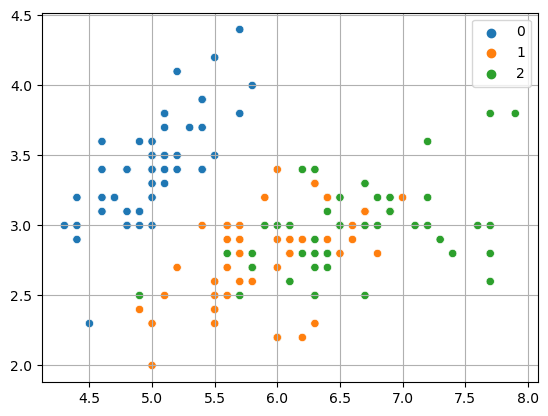

In [198]:
# Vizualize the data
import seaborn as sns
import matplotlib.pyplot as plt
plt.grid()
sns.scatterplot(x=np.concatenate([X_train[:,0], X_test[:,0]]), 
                y=np.concatenate([X_train[:,1], X_test[:,1]]),
                hue=np.concatenate([y_train, y_test]),
                palette=sns.color_palette("tab10"))

/tmp/ipykernel_12721/1293253800.py:3: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(x=(X_test[:,0]),


<AxesSubplot: >

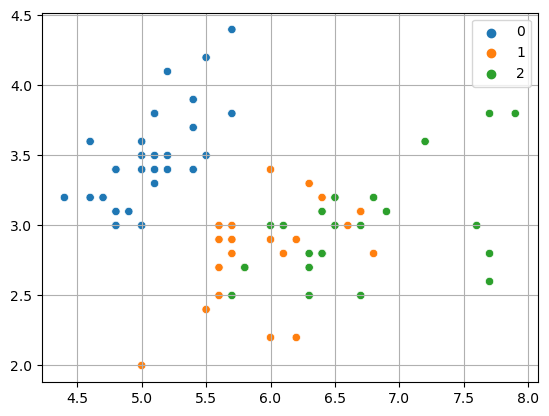

In [189]:
# Only visualize the test
plt.grid()
sns.scatterplot(x=(X_test[:,0]), 
                y=(X_test[:,1]),
                hue=(y_test),
                palette=sns.color_palette("tab10"))

In [190]:
from scipy.spatial import distance
from collections import Counter
# K-nearest neighbour algorithm
def knn(X_train, X_test, y_train, y_test, k=5):
    """
    K-nearest neighbour algorithm 
    """
    train = np.concatenate([X_train, y_train.reshape(-1,1)], axis=1)
    test = np.concatenate([X_test, y_test.reshape(-1,1)], axis=1)
    ys = []
    
    for x in test:
        top_k = np.array(sorted(
            train, 
            key=lambda entry: distance.euclidean(entry[0:2], x[0:2])
            ))[:k,2]
        freq_dict = Counter(top_k)
        y_prim = list(sorted(freq_dict.items(), key=lambda entry: entry[1], reverse=True))[0][0]
        ys.append(y_prim)

    return ys


In [197]:
# Testing the accuaracy of our knn
ys = knn(X_train, X_test, y_train, y_test, k=3)
accuaracy = sum(ys == y_test) / len(ys) 
print(f"Accuaracy: {accuaracy * 100} %")

Accuaracy: 76.0 %
